# 第7章 ニューラルネットワーク・ディープラーニング（1）
## 7.1 ニューロンモデル
サンプルコードなし

## 7.2 ニューラルネットワークモデル

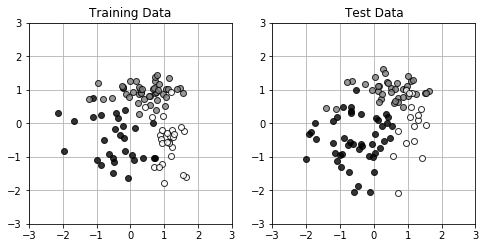

In [1]:
# リスト 7-1-(1)
import numpy as np

# データ生成 --------------------------------------
np.random.seed(seed=1)  # 乱数を固定
N = 200 # データの数
K = 3   # 分布の数
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]  # X0 の範囲, 表示用
X_range1 = [-3, 3]  # X1 の範囲, 表示用
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])    # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  #分布の分散
Pi = np.array([0.4, 0.8, 1])   # 各分布の割合
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

# リスト 7-1-(2)
# 2分類のデータをテスト・訓練データに分割-------------
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]

# データを'class_data.npz'に保存--------------------
np.savez('class_data.npz', X_train=X_train, T_train=T_train, X_test=X_test, T_test=T_test, X_range0=X_range0, X_range1=X_range1)

# リスト 7-1-(3)
import matplotlib.pyplot as plt
%matplotlib inline

# データの図示 -------------------------------------
def show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

# メイン -------------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

===7-1-(4)===
(array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]]), array([[2.6971835 , 2.6971835 , 2.6971835 ],
       [1.49172649, 1.49172649, 1.49172649]]), array([[0.84859175, 0.84859175, 1.        ],
       [0.24586324, 0.24586324, 1.        ]]), array([[ 1.72359839,  1.72359839,  0.        ],
       [-1.12079826, -1.12079826,  0.        ]]))
===7-1-(5)===
1.0986122886681098
===7-1-(6)===
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


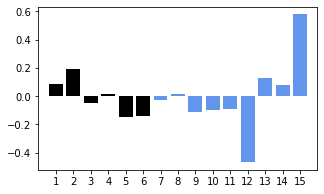

In [2]:
# リスト 7-1-(4)
# シグモイド関数 ------------------------------------
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# ネットワーク --------------------------------------
def FNN(wv, M, K, x):
    N, D = x.shape  # 入力次元
    w = wv[:M * (D + 1)]    # 中間層ニューロンへの重み
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]    # 出力層ニューロンへの重み
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1))    # 中間層ニューロンの入力総和
    z = np.zeros((N, M + 1))    # 中間層ニューロンの出力
    a = np.zeros((N, K))    # 出力層ニューロンの入力総和
    y = np.zeros((N, K))    # 出力層ニューロンの出力
    for n in range(N):
        # 中間層の計算
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1])
            z[n, m] = sigmoid(b[n, m])
        # 出力層の計算
        z[n, M] = 1 # ダミーニューロン
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b

# test ---------------------------------------------
WV = np.ones(15)
M = 2
K = 3
print('===7-1-(4)===')
print(FNN(WV, M, K, X_train[:2, :]))

# リスト 7-1-(5)
# 平均交差エントロピー誤差 ----------------------------
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce

# test ---------------------------------------------
WV = np.ones(15)
M = 2
K = 3
print('===7-1-(5)===')
print(CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :]))

# リスト 7-1-(6)
# 数値微分 ------------------------------------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv

# dVWの表示 -----------------------------------------
def show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align='center', color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align='center', color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

# test ---------------------------------------------
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print('===7-1-(6)===')
print(dWV)
plt.figure(1, figsize=(5, 3))
show_WV(dWV, M)
plt.show()

Calculation time : 142.176 sec


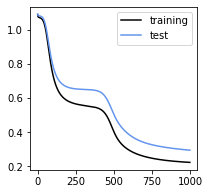

In [3]:
# リスト 7-1-(7)
import time

# 数値微分を使った勾配法 -----------------------------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    for i in range(n):
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test

# メイン -------------------------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print('Calculation time : {0:.3f} sec'.format(calculation_time))

# リスト 7-1-(8)
# 学習誤差の表示 ------------------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
plt.show()

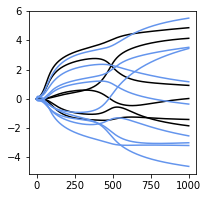

In [4]:
# リスト 7-1-(9)
# 重みの時間発展の表示 -------------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

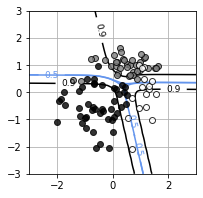

In [5]:
# リスト 7-1-(10)
# 境界線表示関数 -------------------------------------
def show_FNN(wv, M, K):
    xn = 60 # 等高線表示の解像度
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x  = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn,'F')]
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

# 境界線の表示 ---------------------------------------
plt.figure(1, figsize=(3, 3))
show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


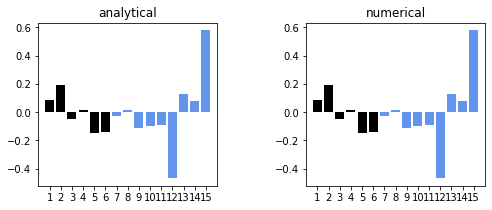

In [6]:
# リスト 7-1-(11)
# 解析的微分 ----------------------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wvをwとvに戻す
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # ①xを入力してyを得る
    y, a, z, b = FNN(wv, M, K, x)
    # 出力変数の準備
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M)    # 1層目誤差
    delta2 = np.zeros(K)    # 2週目誤差 (k = 0の部分は使わず)
    for n in range(N):
        # ②出力層の誤差を求める
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # ③中間層の誤差を求める
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # ④vの勾配dvを求める
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④wの勾配dwを求める
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] /N
    # dwとdvを合体させてdwvとする
    dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

# dWV表示関数 ---------------------------------------
def show_dwv(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align='center', color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align='center', color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

# 動作確認 ------------------------------------------
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print('analytical dWV')
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print('numerical dWV')
print(dWV_num)

plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_dwv(dWV_ana, M)
plt.title('analytical')
plt.subplot(1, 2, 2)
show_dwv(dWV_num, M)
plt.title('numerical')
plt.show()

Calculation time : 18.264 sec


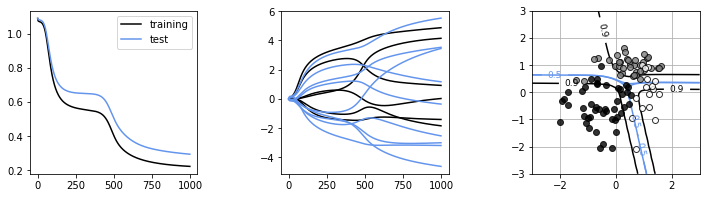

In [8]:
# リスト 7-1-(12)
# 解析的微分を使った勾配法 ---------------------------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test

# メイン -------------------------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print('Calculation time : {0:.3f} sec'.format(calculation_time))

# リスト 7-1-(13)
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 学習誤差の表示 ------------------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 重みの時間発展の表示 -------------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 境界線の表示 --------------------------------------
plt.subplot(1, 3, 3)
show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

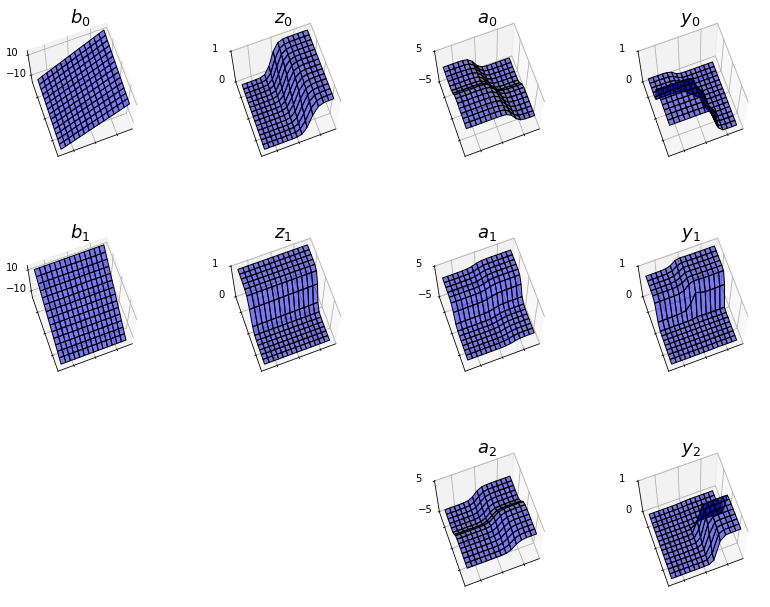

In [9]:
# リスト 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black', rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)

M = 2
K = 3
xn = 15 # 等高線表示の解像度
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.4)
for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))

for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))

plt.show()